# The different imports

In [242]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import random
%matplotlib inline
random.seed(0)

# Loading the Iris dataset

1 - renaming a column of a data set

2 - verifie if there is no null values in the dataset 

In [243]:
# Load Iris data 
df = sns.load_dataset("iris")
# Renaming a column
df = df.rename(columns={"species":"label"})
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width   label
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Train Test Split

In [245]:
# This fonction splits the dataSet into a test dataFrame and a Train dataFrame given a certain test size
def train_test_split(df, test_size):

    # if the given test size is a proprtion 
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.to_list() # transform the indices of the DataSet to a list 
    test_indices = random.sample(indices, test_size) # Selecting a sample of the indices 
    test_df = df.loc[test_indices] # select the informations of a certain row 
    train_df = df.drop(test_indices) # drop the informations of a certain row here it's the test_df

    return train_df, test_df

In [246]:
train_df, test_df = train_test_split(df, test_size=20)
test_df.head(50)

,sepal_length,sepal_width,petal_length,petal_width,label
98,5.1,2.5,3.0,1.1,versicolor
107,7.3,2.9,6.3,1.8,virginica
10,5.4,3.7,1.5,0.2,setosa
66,5.6,3.0,4.5,1.5,versicolor
130,7.4,2.8,6.1,1.9,virginica
124,6.7,3.3,5.7,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
77,6.7,3.0,5.0,1.7,versicolor
122,7.7,2.8,6.7,2.0,virginica
91,6.1,3.0,4.6,1.4,versicolor


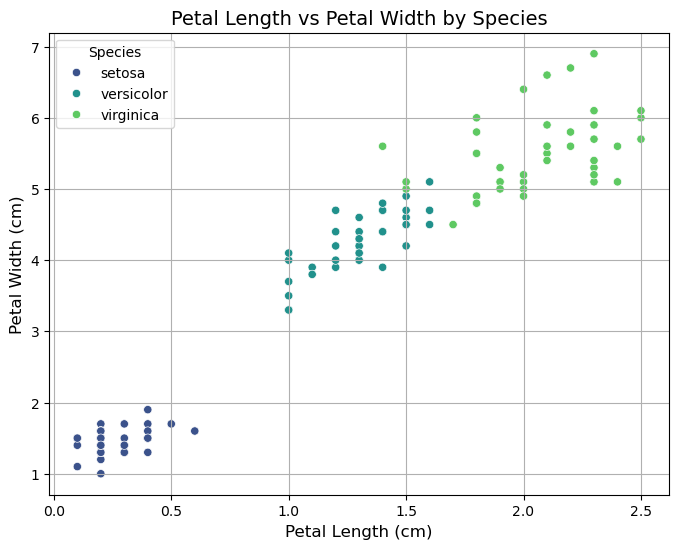

In [247]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x="petal_width",y="petal_length" , hue="label", palette="viridis")

# Add labels and title
plt.title("Petal Length vs Petal Width by Species", fontsize=14)
plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Petal Width (cm)", fontsize=12)
plt.legend(title="Species")
plt.grid(True)
plt.show()

# Helper functions 

In [248]:
data = train_df.values # Transform the dataFrame to a Numpy array
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa']], dtype=object)

### Data pure ?

In [249]:
"""
df["label"].nunique()  # use of nunique to verifie if a element is unique in a column (count #of different elements in a column)

label_column = data[:,-1] # To access the last value of every row 

# To check if the element of an array is unique we use np.unique
# It shows the different values of the array
unique  = len(np.unique(label_column)) == 3
unique
print(label_column)
"""

'\ndf["label"].nunique()  # use of nunique to verifie if a element is unique in a column (count #of different elements in a column)\n\nlabel_column = data[:,-1] # To access the last value of every row \n\n# To check if the element of an array is unique we use np.unique\n# It shows the different values of the array\nunique  = len(np.unique(label_column)) == 3\nunique\nprint(label_column)\n'

In [250]:
def check_purity(data):
    label_column = data[:,-1] # To access the last value of every row 
    return len(np.unique(label_column)) == 1

#check_purity(train_df[train_df.petal_width < 1.2].values)

### Classify

Main objectif is to classify the data 

In [254]:
def classify_data(data):
    if(check_purity(data)):
        classification = data[0,-1]
    else:
        label_column = data[:,-1]
        # We use retuen_counts = True to get a number of the occurences of each classification 
        unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True) 
        # Then from the array returned we must find the max (.argmax())
        classification = unique_classes[counts_unique_classes.argmax()]
    return classification 

In [ ]:
# the use of an and in the npArray
classification = classify_data(train_df[(train_df.petal_width < 2) & (train_df.petal_width > 0.5)].values)

print(classification)

versicolor


In [253]:
if(check_purity(data)):
    classe = data[0,-1]

label_column = data[:,-1]
# We use retuen_counts = True to get a number of the occurences of each classe 
unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True) 
print(unique_classes, counts_unique_classes)

# Then from the array returned we must find the max (.argmax())
unique_classes[counts_unique_classes.argmax()]


['setosa' 'versicolor' 'virginica'] [46 42 42]


'setosa'

### Potential splits 

In [ ]:
def get_potentail_split(data):
    return potential_splits

In [ ]:
potential_splits = {}

n_columns = data.shape[1]

for column_index in range(n_columns -1):
    potential_splits[column_index] = []
    value = data[:, column_index]


5